# Prerequsite test

In [28]:
import numpy as np
import time
import pandas as pd

## 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

- the n rows will be multiplied by m columns for each of the k multiplications so it will require `n × m × k` multiplications.
- the n rows will be multiplied by m columns for each of the k-1 additions so it will require `n × m × (k-1)` additions.

## 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?


In [29]:
import numpy as np
import time

list1 = [[1,2,3],
         [5,6,7]]

list2 = [[1,1,9,3],
         [5,6,1,3],
         [8,9,0,1]]

n, k, m = len(list1), len(list1[0]), len(list2[0])
ans = []

naive_time_start = time.time()
for i in range(n):
    res = []
    for j in range(m):
        val = 0
        for l in range(k):
            val += list1[i][l] * list2[l][j]
        res.append(val)
    ans.append(res)

naive_time_end = time.time()

print(ans)
print("time for naive is: ", naive_time_end - naive_time_start)

numpy_time_start = time.time()
np_res = np.matmul(list1, list2)
numpy_time_end = time.time()

print(np_res)
print("time for numpy: ", numpy_time_end - numpy_time_start)

print("Time difference between naive and numpy impl is: ", (naive_time_end - naive_time_start) - (numpy_time_end - numpy_time_start))

[[35, 40, 11, 12], [91, 104, 51, 40]]
time for naive is:  7.82012939453125e-05
[[ 35  40  11  12]
 [ 91 104  51  40]]
time for numpy:  4.8160552978515625e-05
Time difference between naive and numpy impl is:  3.0040740966796875e-05


the numpy module uses faster implmentation of the matrix multiplication which has time complexity ~O(n^2.807) which is why the results are faster than the naive O(n^3) implemnetation.

## 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?



In [30]:
import time
def max_val_ind(arr):
    max_val = arr[0]
    max_val_ind = 0
    for i in range(len(arr)):
        if arr[i] > max_val:
            max_val = arr[i]
            max_val_ind = i
    return max_val_ind

def find_median(arr):
    n = len(arr)
    if n % 2 == 1:
        median_index = n // 2
    else:
        median_index = n // 2 - 1

    for i in range(median_index + 1):
        max_index = max_val_ind(arr)
        if i == median_index:
            median_value = arr[max_index]
        arr[max_index] = float('-inf')

    if n % 2 == 0:
        next_max_index = max_val_ind(arr)
        median_value = (median_value + arr[next_max_index]) / 2

    return median_value

list1 = [2, 6, 1, 0, 5, 10, 18, 1]
s_time = time.time()
median = find_median(list1)
e_time = time.time()
print(median)
print(e_time - s_time)


3.5
6.246566772460938e-05


The above naive impl is O(n^2)


In [31]:
import time

def median_sorted(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        lower_mid = sorted_arr[n // 2 - 1]
        upper_mid = sorted_arr[n // 2]
        return (lower_mid + upper_mid) / 2

list1 = [2, 6, 1, 0, 5, 10, 18, 1]
s_time = time.time()
median = median_sorted(list1)
e_time = time.time()
print(median)
print(e_time - s_time)


3.5
2.765655517578125e-05


this impl sorts the array and return the median value with the complexity O(nlogn)

In [32]:
import time
list1 = np.array([2, 6, 1, 0, 5, 10, 18, 1])
s_time = time.time()
median = np.median(list1)
e_time = time.time()

print(median)
print(e_time - s_time)

3.5
0.0004258155822753906


## 4. What is the gradient of the following function with respect to x and y?
$x^2y+y^3sin(x)$

The gradient $$
\nabla f = \begin{bmatrix}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y}
\end{bmatrix}
$$


$$
=
\left[ \begin{array}{c}
2xy + y^3 \cos(x) \\
x^2 + 3y^2 \sin(x)
\end{array} \right]
$$



## 5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y



In [33]:
import jax.numpy as jnp
import jax

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

grad_f = jax.grad(f, argnums=(0, 1))

x_val = 1.0
y_val = 2.0

gradient_jax_value = grad_f(x_val, y_val)

def analytical_gradient(x, y):
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return jnp.array([df_dx, df_dy])

gradient_analytical = analytical_gradient(x_val, y_val)

print("JAX Gradient:", gradient_jax_value[0], gradient_jax_value[1])
print("Analytical Gradient:", gradient_analytical)


JAX Gradient: 8.322418 11.0976515
Analytical Gradient: [ 8.322418  11.0976515]


## 6. Use sympy to confirm that you obtain the same gradient analytically.



In [34]:
from sympy import symbols, Matrix, sin, cos

x, y = symbols('x y')

f = x**2 * y + y**3 * sin(x)

gradient = Matrix([f]).jacobian([x, y])

x_val = 1.0
y_val = 2.0

gradient_evaluated = gradient.subs({x: x_val, y: y_val})
gradient_evaluated = [round(float(val), 6) for val in gradient_evaluated]

print(gradient_evaluated)

[8.322418, 11.097652]


## 7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [35]:
students_records = {
    2022: {
        "Branch 1": {
            "Roll Number": 1,
            "Name": "N",
            "Marks": {
                "Maths": 100,
                "English": 70
            }
        },
        "Branch 2": {
            "Roll Number": None,
            "Name": None,
            "Marks": {
                "Maths": None,
                "English": None
            }
        }
    },
    2023: {
        "Branch 1": {
            "Roll Number": None,
            "Name": None,
            "Marks": {
                "Maths": None,
                "English": None
            }
        },
        "Branch 2": {
            "Roll Number": None,
            "Name": None,
            "Marks": {
                "Maths": None,
                "English": None
            }
        }
    },
    2024: {
        "Branch 1": {
            "Roll Number": None,
            "Name": None,
            "Marks": {
                "Maths": None,
                "English": None
            }
        },
        "Branch 2": {
            "Roll Number": None,
            "Name": None,
            "Marks": {
                "Maths": None,
                "English": None
            }
        }
    },
    2025: {
        "Branch 1": {
            "Roll Number": None,
            "Name": None,
            "Marks": {
                "Maths": None,
                "English": None
            }
        },
        "Branch 2": {
            "Roll Number": None,
            "Name": None,
            "Marks": {
                "Maths": None,
                "English": None
            }
        }
    }
}


## 8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects

In [36]:
class Student:
    def __init__(self, roll_number=None, name=None, marks=None):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks if marks is not None else {}

    def __repr__(self):
        return f"Student(Name: {self.name}, Roll Number: {self.roll_number}, Marks: {self.marks})"

    def __str__(self):
        return f"Roll Number: {self.roll_number}, Name: {self.name}, Marks: {self.marks}"


class Branch:
    def __init__(self, name=None):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch(Name: {self.name}, Students: {self.students})"

    def __str__(self):
        students_str = "\n    ".join(str(student) for student in self.students)
        return f"Branch: {self.name}\n    Students:\n    {students_str}"


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year(Year: {self.year}, Branches: {self.branches})"

    def __str__(self):
        branches_str = "\n  ".join(str(branch) for branch in self.branches)
        return f"Year: {self.year}\n  Branches:\n  {branches_str}"


class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        return f"Database(Years: {self.years})"

    def __str__(self):
        years_str = "\n".join(str(year) for year in self.years)
        return f"Database:\n{years_str}"


# Example usage:
db = Database()

year_2022 = Year(2022)
branch_1 = Branch("Branch 1")
branch_2 = Branch("Branch 2")

student_1 = Student(1, "N", {"Maths": 100, "English": 70})
branch_1.add_student(student_1)

student_2 = Student()
branch_2.add_student(student_2)

year_2022.add_branch(branch_1)
year_2022.add_branch(branch_2)

db.add_year(year_2022)

year_2023 = Year(2023)
year_2024 = Year(2024)
year_2025 = Year(2025)

for ele in [year_2023, year_2024, year_2025]:
    branch_1 = Branch("Branch 1")
    branch_2 = Branch("Branch 2")
    student_1 = Student()
    branch_1.add_student(student_1)
    student_2 = Student()
    branch_2.add_student(student_2)
    ele.add_branch(branch_1)
    ele.add_branch(branch_2)
    db.add_year(ele)

print(db)


Database:
Year: 2022
  Branches:
  Branch: Branch 1
    Students:
    Roll Number: 1, Name: N, Marks: {'Maths': 100, 'English': 70}
  Branch: Branch 2
    Students:
    Roll Number: None, Name: None, Marks: {}
Year: 2023
  Branches:
  Branch: Branch 1
    Students:
    Roll Number: None, Name: None, Marks: {}
  Branch: Branch 2
    Students:
    Roll Number: None, Name: None, Marks: {}
Year: 2024
  Branches:
  Branch: Branch 1
    Students:
    Roll Number: None, Name: None, Marks: {}
  Branch: Branch 2
    Students:
    Roll Number: None, Name: None, Marks: {}
Year: 2025
  Branches:
  Branch: Branch 1
    Students:
    Roll Number: None, Name: None, Marks: {}
  Branch: Branch 2
    Students:
    Roll Number: None, Name: None, Marks: {}


## 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.


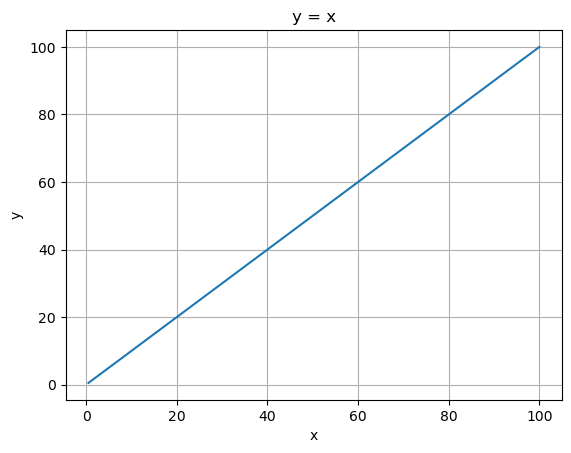

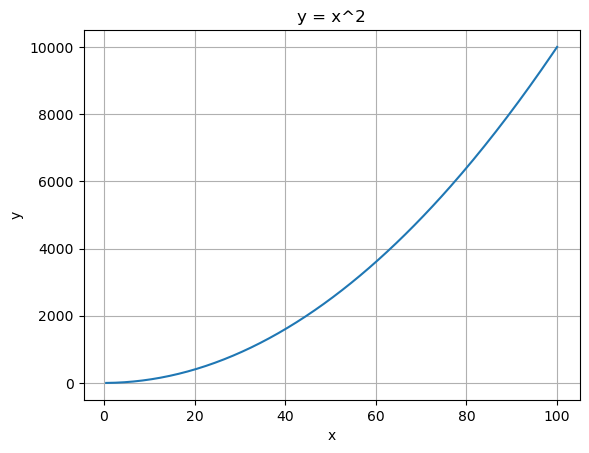

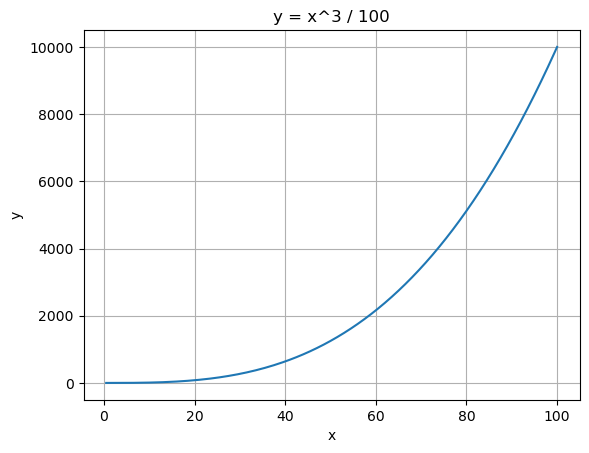

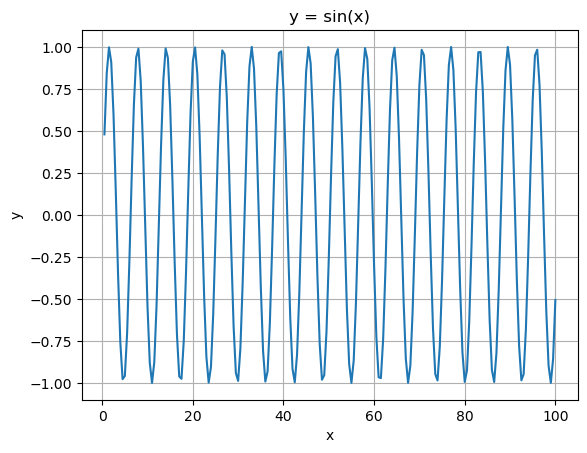

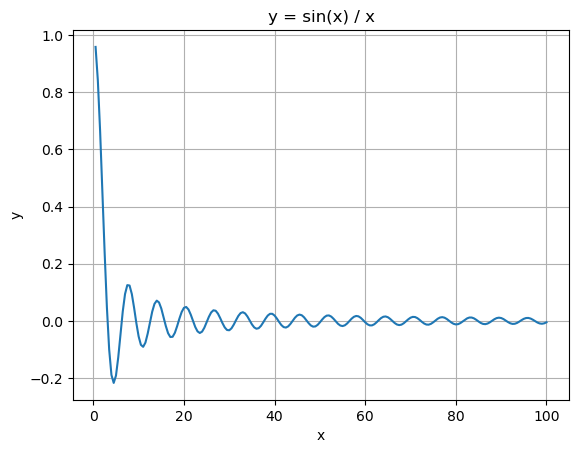

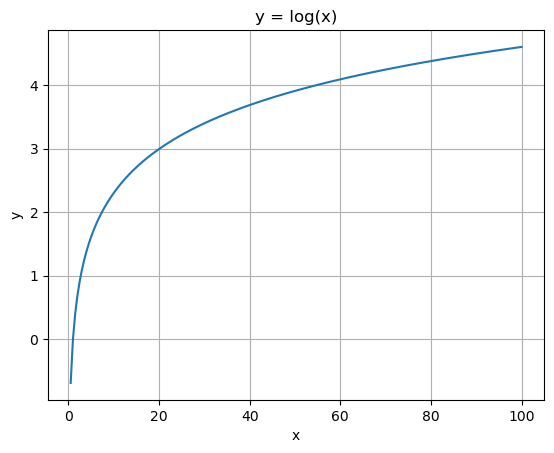

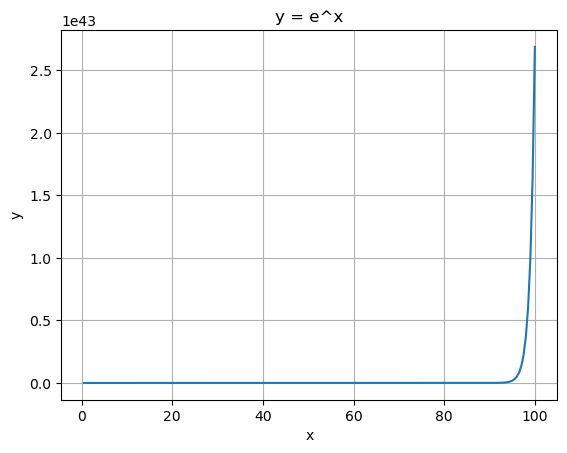

In [37]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

functions = [
    ("y = x", lambda x: x),
    ("y = x^2", lambda x: x**2),
    ("y = x^3 / 100", lambda x: x**3 / 100),
    ("y = sin(x)", lambda x: np.sin(x)),
    ("y = sin(x) / x", lambda x: np.sin(x) / x),
    ("y = log(x)", lambda x: np.log(x)),
    ("y = e^x", lambda x: np.exp(x))
]

for i, (title, func) in enumerate(functions, 1):
    y = func(x)
    plt.figure()
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
    print()


## 10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [38]:
random_matrix = np.random.uniform(1.0, 2.0, (20, 5))

df = pd.DataFrame(random_matrix, columns=["a", "b", "c", "d", "e"])
highest_std_col = df.std().idxmax()
lowest_mean_row = df.mean(axis=1).idxmin()

print(f"Column with the highest standard deviation: {highest_std_col}")
print(f"Row with the lowest mean: {lowest_mean_row}")
print(df)

Column with the highest standard deviation: e
Row with the lowest mean: 4
           a         b         c         d         e
0   1.977395  1.966509  1.668128  1.947819  1.974536
1   1.634355  1.101494  1.252008  1.648566  1.081409
2   1.195919  1.677580  1.739657  1.207470  1.936977
3   1.011578  1.741574  1.063096  1.540099  1.286394
4   1.205371  1.077462  1.047532  1.570874  1.609898
5   1.472285  1.993985  1.625006  1.351777  1.969117
6   1.465800  1.725913  1.964865  1.272422  1.916338
7   1.711262  1.627062  1.378292  1.766547  1.425445
8   1.820959  1.477436  1.158281  1.677449  1.266536
9   1.735776  1.184574  1.787836  1.863230  1.308299
10  1.557752  1.293621  1.552968  1.259618  1.686084
11  1.090191  1.999370  1.301435  1.680950  1.686087
12  1.624817  1.339456  1.900674  1.365335  1.691772
13  1.060828  1.745026  1.332306  1.558433  1.185135
14  1.663663  1.377709  1.194852  1.210752  1.947294
15  1.410094  1.113830  1.889944  1.017207  1.997404
16  1.223452  1.337071  1

## 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.



In [39]:
random_matrix = np.random.uniform(1, 2, (20, 5))

df = pd.DataFrame(random_matrix, columns=["a", "b", "c", "d", "e"])
df["f"] = df["a"] + df["b"] + df["c"] + df["d"] + df["e"]
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")

num_lt8_rows = df[df["g"] == "LT8"].shape[0]
std_f_lt8 = df[df["g"] == "LT8"]["f"].std()
std_f_gt8 = df[df["g"] == "GT8"]["f"].std()

print(f"Number of rows where g is LT8: {num_lt8_rows}")
print(f"Standard deviation of f where g is LT8: {std_f_lt8}")
print(f"Standard deviation of f where g is GT8: {std_f_gt8}")

print(df)

Number of rows where g is LT8: 18
Standard deviation of f where g is LT8: 0.5984759574100477
Standard deviation of f where g is GT8: 0.2708943029653127
           a         b         c         d         e         f    g
0   1.765596  1.649392  1.554187  1.484909  1.058557  7.512641  LT8
1   1.839976  1.378659  1.277912  1.232301  1.196784  6.925631  LT8
2   1.717529  1.687575  1.736055  1.182697  1.634743  7.958599  LT8
3   1.151553  1.167023  1.478779  1.409381  1.183867  6.390602  LT8
4   1.948860  1.579706  1.592165  1.397767  1.393835  7.912333  LT8
5   1.428219  1.351679  1.056218  1.904528  1.112422  6.853065  LT8
6   1.459851  1.355357  1.067290  1.959321  1.367047  7.208867  LT8
7   1.951963  1.017031  1.952214  1.611338  1.282442  7.814987  LT8
8   1.273299  1.604722  1.989061  1.477655  1.674739  8.019475  GT8
9   1.402169  1.329670  1.223084  1.840914  1.665703  7.461540  LT8
10  1.809011  1.432286  1.576026  1.479513  1.201623  7.498458  LT8
11  1.880552  1.533738  1.345904

## 12. Write a small piece of code to explain broadcasting in numpy.



In [40]:
# 1d array
a = np.array([1.0, 2.0, 3.0])
# Scalar value
b = 2.0

# Broadcasting the scalar across the array
result = a * b
print("Array a:", a)
print("Scalar b:", b)
print("Result of a * b:", result)


Array a: [1. 2. 3.]
Scalar b: 2.0
Result of a * b: [2. 4. 6.]


## 13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [41]:
min_ele = float('inf')
arr = np.array([[4,2,3], [1,0,3]])

it = np.nditer(arr, flags=['multi_index'])
while not it.finished:
  if it[0] < min_ele:
    min_ele = it[0]
    min_index = it.multi_index
  it.iternext()

rows, cols = arr.shape
flat_index = min_index[0] * cols + min_index[1]
print(flat_index)
print(np.argmin(arr))

4
4
